In [107]:
import pandas as pd
import sqlite3

In [108]:
!ls zippedData/

bom.movie_gross.csv.gz  im.db2                  tmdb.movies.csv.gz
im.db                   needed_imdb.csv         tn.movie_budgets.csv.gz
im.db 2                 rt.movie_info.tsv.gz
im.db.zip               rt.reviews.tsv.gz


In [109]:
#must do below to open .db files 
# I had to again, unzip the original file to create another data frame
#in this style, since I converted the last to a csv
conn = sqlite3.connect('zippedData/im.db 2')

In [110]:
query1 ="""
SELECT start_year, primary_title
FROM movie_basics
ORDER BY
    start_year 
    
;
"""

pd.read_sql_query(query1, conn)

,start_year,primary_title
0,2010,Pál Adrienn
1,2010,So Much for Justice!
2,2010,Children of the Green Dragon
3,2010,The Final Journey
4,2010,Quantum Quest: A Cassini Space Odyssey
...,...,...
146139,2024,Fantastic Beasts and Where to Find Them 5
146140,2025,Avatar 4
146141,2026,Untitled Star Wars Film
146142,2027,Avatar 5


In [111]:
query1 = """
SELECT DISTINCT
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)


,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
69988,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
69989,8.2,5,-1287,-1287
69990,5.6,5,(313) Choices,(313) Choices
69991,6.6,5,#Single,#Single


In [112]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)


,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
69988,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
69989,8.2,5,-1287,-1287
69990,5.6,5,(313) Choices,(313) Choices
69991,6.6,5,#Single,#Single


In [113]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mb.primary_title is mb.original_title
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
59145,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
59146,8.2,5,-1287,-1287
59147,5.6,5,(313) Choices,(313) Choices
59148,6.6,5,#Single,#Single


In [114]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mb.primary_title is not mb.original_title
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,7.2,692794,Iron Man 3,Iron Man Three
1,8.5,677343,The Intouchables,Intouchables
2,7.7,608930,X-Men: First Class,X: First Class
3,7.8,478592,Rogue One: A Star Wars Story,Rogue One
4,7.1,462903,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi
...,...,...,...,...
11829,6.6,5,A Journey with Korean Masters,Ma-seu-teo-keul-lae-seu-ui san-chaek
11830,7.0,5,A Cup of Tea,En kopp te
11831,6.8,5,A Crimson Star,Makkana hoshi
11832,6.6,5,A Better Life Is Elsewhere,Das bessere Leben ist anderswo


*Here, above, we see that the primary title is the common english title version that viewers, and our audience will recognize and understand.*

We also see here that almost 12,000 primary titles do not match their original titles. These must remain in the data set. 

In [115]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mr.numvotes > 50
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
35103,6.6,51,A Reason,A Reason
35104,5.1,51,A Moving Image,A Moving Image
35105,5.5,51,51 Nevada,51 Nevada
35106,5.7,51,1:13:7 Ek Tera Saath,1:13:7 Ek Tera Saath


In [116]:
#above we see that removing any movie with less than 50 votes takes our
#total number from 70k to 35k. 

In [117]:
query1 = """
SELECT 
    mb.primary_title,
    mb.original_title,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mr.numvotes > 50 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,original_title,averagerating,numvotes
0,Inception,Inception,8.8,1841066
1,The Dark Knight Rises,The Dark Knight Rises,8.4,1387769
2,Interstellar,Interstellar,8.6,1299334
3,Django Unchained,Django Unchained,8.4,1211405
4,The Avengers,The Avengers,8.1,1183655
...,...,...,...,...
8027,Baa Baa Land,Baa Baa Land,7.4,51
8028,Alien Addiction,Alien Addiction,8.8,51
8029,Aisheen (Still Alive in Gaza),Aisheen (Still Alive in Gaza),7.8,51
8030,Abe,Abe,8.2,51


In [118]:
query1 = """
SELECT 
    mb.primary_title,
    mb.genres,
    mr.averagerating,
    mr.numvotes, 
    p.primary_name AS Director_Name,
    mb.start_year,
    mb.runtime_minutes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
    JOIN 
        directors as d
    ON
        d.movie_id = mb.movie_id
    JOIN 
        persons as p
    ON 
        p.person_id = d.person_id
WHERE
    mr.numvotes > 50 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.averagerating DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [119]:
query1 = """
SELECT 
    mb.primary_title,
    mb.genres,
    mr.averagerating,
    mr.numvotes, 
    p.primary_name AS Director_Name,
    mb.start_year,
    mb.runtime_minutes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
    JOIN 
        directors as d
    ON
        d.movie_id = mb.movie_id
    JOIN 
        persons as p
    ON 
        p.person_id = d.person_id
WHERE
    mr.numvotes > 25 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.averagerating DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Verdict 19,"Biography,Documentary,Drama",9.8,28,Vyacheslav Bihun,2019,NaN
2,RISE: The Story of Augustines,"Documentary,Music",9.8,45,Todd Howe,2018,80.0
3,Our Friend Jon,Documentary,9.8,28,Edward Payson,2018,NaN
4,La Lección de Anatomía,Documentary,9.8,28,Agustín Kazah,2019,NaN
...,...,...,...,...,...,...,...
11185,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
11186,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
11187,03.ByPass,Drama,7.1,38,Nap Toader,2016,93.0
11188,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [120]:
query1 = """
SELECT *
FROM 
    movie_basics 
GROUP BY
    start_year
ORDER BY
    start_year ASC
;
"""
pd.read_sql_query(query1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
1,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
2,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
4,tt0329539,Rice Girl,Rice Girl,2014,95.0,"Adventure,Comedy,Romance"
5,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi
6,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama"
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
8,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
9,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [121]:
#ImdbNeeded =

In [122]:
#ImdbNeeded.to_csv('zippedData/needed_imdb.csv', index=False)

In [123]:
pd.read_csv("zippedData/needed_imdb.csv")

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [124]:
imdf = pd.read_csv("zippedData/needed_imdb.csv")

In [125]:
imdf.head()

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0


In [126]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7969 non-null   object 
 1   genres           7938 non-null   object 
 2   averagerating    7969 non-null   float64
 3   numvotes         7969 non-null   int64  
 4   Director_Name    7969 non-null   object 
 5   start_year       7969 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 435.9+ KB


In [127]:
imdf.isna().sum()

primary_title        0
genres              31
averagerating        0
numvotes             0
Director_Name        0
start_year           0
runtime_minutes    292
dtype: int64

In [128]:
imdf.min()

/var/folders/1q/n0cxxczs6zn8d4fx32dvdhwm0000gn/T/ipykernel_63064/146472830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  imdf.min()


primary_title      #Female Pleasure
averagerating                   7.1
numvotes                         51
Director_Name        A. Karunakaran
start_year                     2010
runtime_minutes                15.0
dtype: object

In [129]:
#making a copy of our dataframe 
imdf_clean = imdf.copy()

In [130]:
imdf_clean = imdf_clean.dropna(axis=0,subset = ['runtime_minutes'])

In [131]:
#removed any movies listed without runtime, but decided to keep missing genres, as this could be 
#considered a category when analyzing our genre vs. popularity
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [132]:
imdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7677 non-null   object 
 1   genres           7655 non-null   object 
 2   averagerating    7677 non-null   float64
 3   numvotes         7677 non-null   int64  
 4   Director_Name    7677 non-null   object 
 5   start_year       7677 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 479.8+ KB


In [133]:
imdf_clean['genres'] = imdf_clean['genres'].fillna('None')

In [134]:
#see now there are no null values, we converted any nulls to "None" in 
#genres
imdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7677 non-null   object 
 1   genres           7677 non-null   object 
 2   averagerating    7677 non-null   float64
 3   numvotes         7677 non-null   int64  
 4   Director_Name    7677 non-null   object 
 5   start_year       7677 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 479.8+ KB


In [135]:
imdf_clean['genres'].value_counts()

Documentary                    1506
Drama                          1123
Comedy,Drama                    309
Comedy                          227
Drama,Romance                   196
                               ... 
Action,Horror                     1
Drama,History,Musical             1
Adventure,Comedy,Musical          1
Action,Documentary,Thriller       1
Animation,Documentary,War         1
Name: genres, Length: 459, dtype: int64

In [136]:
imdf_clean['Director_Name'].value_counts()

Alex Gibney              15
Srijit Mukherji           9
Shiboprosad Mukherjee     9
Kaushik Ganguly           8
Hanung Bramantyo          8
                         ..
Joel Colón                1
Anna Roussillon           1
Shin'ichirô Ushijima      1
Larry Wessel              1
Mamoru Hoshi              1
Name: Director_Name, Length: 6167, dtype: int64

In [137]:
#require the number of votes to be over 50 
imdf_clean = imdf_clean[imdf_clean['numvotes'] > 50]

In [268]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [138]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [209]:
#create likability column 
imdf_clean['likability'] = (imdf_clean['averagerating'])*(((imdf_clean['start_year']) - 1950)/50)

In [210]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes,likability,viewership,engagement,popularity
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0,13.662,1.273331,1.334216,25.285577
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0,13.386,1.421403,1.561872,27.758336
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0,13.192,1.293483,1.363999,23.948218
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0,13.386,1.203965,1.235216,23.424289
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0,13.248,1.292324,1.362274,24.934259
...,...,...,...,...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0,8.520,1.288617,1.356768,10.505946
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0,8.662,1.247884,1.297233,11.043205
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0,8.946,1.435773,1.584942,14.837130
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0,9.230,1.232999,1.275946,14.407381


In [211]:
#create viewership column 
imdf_clean['viewership'] = (((imdf_clean['numvotes']**(1/6))/10)+1)

In [212]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes,likability,viewership,engagement,popularity
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0,13.662,1.273331,1.334216,25.285577
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0,13.386,1.421403,1.561872,27.758336
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0,13.192,1.293483,1.363999,23.948218
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0,13.386,1.203965,1.235216,23.424289
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0,13.248,1.292324,1.362274,24.934259
...,...,...,...,...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0,8.520,1.288617,1.356768,10.505946
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0,8.662,1.247884,1.297233,11.043205
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0,8.946,1.435773,1.584942,14.837130
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0,9.230,1.232999,1.275946,14.407381


In [213]:
#create engagement column 
imdf_clean['engagement'] = (((imdf_clean['numvotes']**(1/5))/10)+1)

In [214]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes,likability,viewership,engagement,popularity
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0,13.662,1.273331,1.334216,25.285577
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0,13.386,1.421403,1.561872,27.758336
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0,13.192,1.293483,1.363999,23.948218
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0,13.386,1.203965,1.235216,23.424289
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0,13.248,1.292324,1.362274,24.934259
...,...,...,...,...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0,8.520,1.288617,1.356768,10.505946
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0,8.662,1.247884,1.297233,11.043205
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0,8.946,1.435773,1.584942,14.837130
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0,9.230,1.232999,1.275946,14.407381


In [215]:
#create popularity column 
imdf_clean['popularity'] = (((imdf_clean['likability'])*(imdf_clean['viewership']))+ imdf_clean['engagement'])

In [216]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes,likability,viewership,engagement,popularity
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0,13.662,1.273331,1.334216,18.730468
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0,13.386,1.421403,1.561872,20.588778
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0,13.192,1.293483,1.363999,18.427631
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0,13.386,1.203965,1.235216,17.351490
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0,13.248,1.292324,1.362274,18.482979
...,...,...,...,...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0,8.520,1.288617,1.356768,12.335781
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0,8.662,1.247884,1.297233,12.106402
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0,8.946,1.435773,1.584942,14.429370
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0,9.230,1.232999,1.275946,12.656523


In [217]:
imdf_clean['popularity']

0       18.730468
1       20.588778
2       18.427631
3       17.351490
4       18.482979
          ...    
7964    12.335781
7965    12.106402
7966    14.429370
7967    12.656523
7968    13.524960
Name: popularity, Length: 7677, dtype: float64

In [218]:
imdf_clean.loc[imdf_clean['start_year'] >= 2010][['start_year', 'popularity',
                                                 'averagerating']].sort_values(by='popularity')

,start_year,popularity,averagerating
7004,2010,11.380261,7.1
7247,2010,11.380261,7.1
7535,2010,11.380261,7.1
7172,2010,11.392509,7.1
7908,2010,11.410181,7.1
...,...,...,...
681,2012,24.108950,8.4
638,2018,24.839395,8.5
298,2010,25.041407,8.8
317,2019,25.085149,8.8


In [244]:
popdf = imdf_clean.loc[imdf_clean['start_year'] >= 2010][['start_year', 'popularity', 'primary_title', 'genres', 'Director_Name','runtime_minutes',
                                                 'averagerating']].sort_values(by='popularity', ascending = False )

In [245]:
popdf

,start_year,popularity,primary_title,genres,Director_Name,runtime_minutes,averagerating
487,2014,25.177155,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,169.0,8.6
317,2019,25.085149,Avengers: Endgame,"Action,Adventure,Sci-Fi",Anthony Russo,181.0,8.8
298,2010,25.041407,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0,8.8
638,2018,24.839395,Avengers: Infinity War,"Action,Adventure,Sci-Fi",Anthony Russo,149.0,8.5
681,2012,24.108950,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,164.0,8.4
...,...,...,...,...,...,...,...
7908,2010,11.410181,All for the Good of the World and Nosovice!,"Comedy,Documentary",Vít Klusák,82.0,7.1
7172,2010,11.392509,"Terra Deu, Terra Come",Documentary,Rodrigo Siqueira,89.0,7.1
7535,2010,11.380261,Journal d'un coopérant,Drama,Robert Morin,91.0,7.1
7004,2010,11.380261,To Die Is Hard,"Action,Comedy",Glenn Berggoetz,87.0,7.1


In [242]:
popdf['genres'].value_counts()

Documentary                  1506
Drama                        1123
Comedy,Drama                  309
Comedy                        227
Drama,Romance                 196
                             ... 
Adventure,Horror,Sci-Fi         1
Animation,Biography             1
Comedy,Musical,Western          1
Animation,Fantasy,Mystery       1
Animation,Music                 1
Name: genres, Length: 459, dtype: int64

In [248]:
popdf_head = popdf.head(100)

In [256]:
popdf_head['genres'].value_counts().head(11)

Action,Adventure,Sci-Fi       16
Action,Adventure,Comedy        6
Action,Adventure,Animation     5
Drama                          5
Adventure,Animation,Comedy     4
Biography,Drama,Thriller       3
Biography,Drama,History        3
Crime,Drama                    3
Biography,Comedy,Drama         3
Action,Adventure,Fantasy       3
Drama,Mystery,Sci-Fi           3
Name: genres, dtype: int64

<AxesSubplot:>

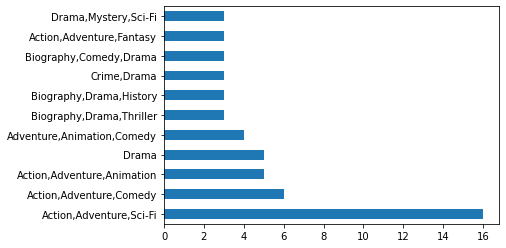

In [259]:
popdf_head['genres'].value_counts().head(11).plot(kind="barh")

In [260]:
popdf_head_11 = popdf_head['genres'].value_counts().head(11)

In [261]:
popdf_head_11

Action,Adventure,Sci-Fi       16
Action,Adventure,Comedy        6
Action,Adventure,Animation     5
Drama                          5
Adventure,Animation,Comedy     4
Biography,Drama,Thriller       3
Biography,Drama,History        3
Crime,Drama                    3
Biography,Comedy,Drama         3
Action,Adventure,Fantasy       3
Drama,Mystery,Sci-Fi           3
Name: genres, dtype: int64

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

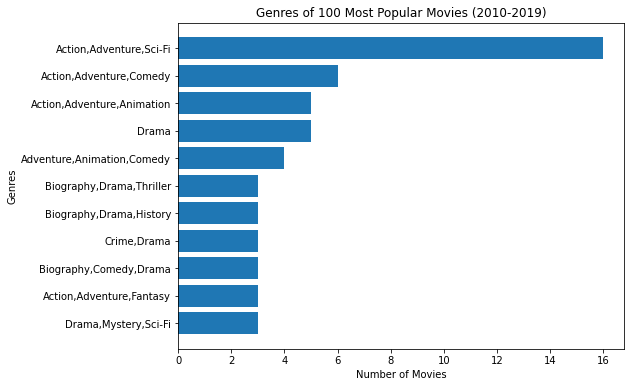

In [385]:
fig, ax = plt.subplots(figsize=(8, 6))

# Making the bar chart horizonal to more easily read animal types
ax.barh(popdf_head_11.index, popdf_head_11)

# inverting y axis so it shows in size order
ax.invert_yaxis()


# adjusting the X axis format to add commas
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_title("Genres of 100 Most Popular Movies (2010-2019)")
ax.set_ylabel("Genres")
ax.set_xlabel("Number of Movies")
plt.show()

In [269]:
popdf

,start_year,popularity,primary_title,genres,Director_Name,runtime_minutes,averagerating
487,2014,25.177155,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,169.0,8.6
317,2019,25.085149,Avengers: Endgame,"Action,Adventure,Sci-Fi",Anthony Russo,181.0,8.8
298,2010,25.041407,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0,8.8
638,2018,24.839395,Avengers: Infinity War,"Action,Adventure,Sci-Fi",Anthony Russo,149.0,8.5
681,2012,24.108950,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,164.0,8.4
...,...,...,...,...,...,...,...
7908,2010,11.410181,All for the Good of the World and Nosovice!,"Comedy,Documentary",Vít Klusák,82.0,7.1
7172,2010,11.392509,"Terra Deu, Terra Come",Documentary,Rodrigo Siqueira,89.0,7.1
7535,2010,11.380261,Journal d'un coopérant,Drama,Robert Morin,91.0,7.1
7004,2010,11.380261,To Die Is Hard,"Action,Comedy",Glenn Berggoetz,87.0,7.1


In [272]:
popdf.sort_values(by='start_year', ascending = True )

,start_year,popularity,primary_title,genres,Director_Name,runtime_minutes,averagerating
7247,2010,11.380261,Self Made,Documentary,Gillian Wearing,88.0,7.1
3046,2010,12.647710,1 a Minute,"Documentary,Drama",Namrata Singh Gujral,90.0,7.7
2604,2010,12.647710,The Other Chelsea: A Story from Donetsk,"Documentary,Drama",Jakob Preuss,89.0,7.7
7479,2010,12.647845,Little Rose,"Drama,History,Romance",Jan Kidawa-Blonski,118.0,7.1
3743,2010,12.651935,The Dark Side of Chocolate,"Documentary,News",Miki Mistrati,46.0,7.5
...,...,...,...,...,...,...,...
4466,2019,13.412438,Suryakantham,"Comedy,Romance",Pranith Bramandapally,139.0,7.4
1462,2019,15.814759,At the Heart of Gold: Inside the USA Gymnastic...,Documentary,Erin Lee Carr,88.0,8.1
1428,2019,15.815738,Chasing Happiness,Documentary,John Taylor,96.0,8.1
892,2019,15.093594,Konttho,Drama,Shiboprosad Mukherjee,144.0,8.3


In [306]:
start_year_DF = imdf_clean.loc[imdf_clean['start_year'] >= 2010][['start_year', 'popularity']].sort_values(by='start_year', ascending = True )

In [310]:
imdf_clean

start_year  popularity
2017        13.212025     4
2011        12.172688     4
2010        11.380261     3
2011        11.881410     3
            11.949057     3
                         ..
2013        13.840532     1
            13.839077     1
            13.829485     1
            13.822455     1
2019        25.085149     1
Length: 7309, dtype: int64

In [275]:
year_pop = imdf_clean.loc[imdf_clean['start_year'] >= 2010][['start_year', 'popularity']].sort_values(by='start_year', ascending = True )

In [295]:
imdf_clean.loc[imdf_clean['start_year'] == 2010][['popularity']].mean()


popularity    13.376291
dtype: float64

In [297]:
imdf_clean.loc[imdf_clean['start_year'] == 2011][['popularity']].mean()

popularity    13.580739
dtype: float64

In [298]:
imdf_clean.loc[imdf_clean['start_year'] == 2012][['popularity']].mean()

popularity    13.795367
dtype: float64

In [299]:
imdf_clean.loc[imdf_clean['start_year'] == 2013][['popularity']].mean()

popularity    13.958727
dtype: float64

In [300]:
imdf_clean.loc[imdf_clean['start_year'] == 2014][['popularity']].mean()

popularity    14.205784
dtype: float64

In [301]:
imdf_clean.loc[imdf_clean['start_year'] == 2015][['popularity']].mean()

popularity    14.414089
dtype: float64

In [302]:
imdf_clean.loc[imdf_clean['start_year'] == 2016][['popularity']].mean()

popularity    14.587634
dtype: float64

In [303]:
imdf_clean.loc[imdf_clean['start_year'] == 2017][['popularity']].mean()

popularity    14.70643
dtype: float64

In [304]:
imdf_clean.loc[imdf_clean['start_year'] == 2018][['popularity']].mean()

popularity    14.919142
dtype: float64

In [305]:
imdf_clean.loc[imdf_clean['start_year'] == 2019][['popularity']].mean()

popularity    15.340561
dtype: float64

In [362]:
y = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
x = np.array([13.376, 13.58, 13.795, 13.958, 14.205, 14.414, 14.587, 14.706, 14.919, 15.34])

yearpop_df = pd.DataFrame(x,y)

In [363]:
yearpop_df

,0
2010,13.376
2011,13.580
2012,13.795
2013,13.958
2014,14.205
2015,14.414
2016,14.587
2017,14.706
2018,14.919
2019,15.340


In [365]:
yearpop_df.values

array([[13.376],
       [13.58 ],
       [13.795],
       [13.958],
       [14.205],
       [14.414],
       [14.587],
       [14.706],
       [14.919],
       [15.34 ]])

In [345]:
data = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

data_df = pd.DataFrame(data, columns=["Year"])

In [346]:
data_df

,Year
0,2010
1,2011
2,2012
3,2013
4,2014
5,2015
6,2016
7,2017
8,2018
9,2019


In [355]:
data_df['AveragePopularity'] = x

In [357]:
yearpop = data_df

In [358]:
yearpop

,Year,AveragePopularity
0,2010,13.376
1,2011,13.580
2,2012,13.795
3,2013,13.958
4,2014,14.205
5,2015,14.414
6,2016,14.587
7,2017,14.706
8,2018,14.919
9,2019,15.340


In [368]:
yearpop["Year"]

0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
6    2016
7    2017
8    2018
9    2019
Name: Year, dtype: int64

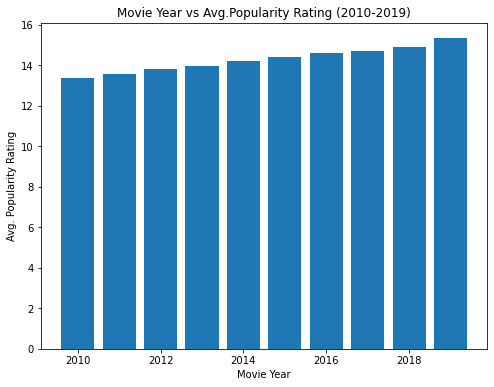

In [372]:
fig, ax = plt.subplots(figsize=(8, 6))

# Making the bar chart horizonal to more easily read
ax.bar(yearpop["Year"], yearpop["AveragePopularity"])

# inverting y axis so it shows in size order
#ax.invert_yaxis()


# adjusting the X axis format to add commas
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_title("Movie Year vs Avg.Popularity Rating (2010-2019)")
ax.set_ylabel("Avg. Popularity Rating")
ax.set_xlabel("Movie Year")
plt.show()

In [373]:
popdf

,start_year,popularity,primary_title,genres,Director_Name,runtime_minutes,averagerating
487,2014,25.177155,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,169.0,8.6
317,2019,25.085149,Avengers: Endgame,"Action,Adventure,Sci-Fi",Anthony Russo,181.0,8.8
298,2010,25.041407,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0,8.8
638,2018,24.839395,Avengers: Infinity War,"Action,Adventure,Sci-Fi",Anthony Russo,149.0,8.5
681,2012,24.108950,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,164.0,8.4
...,...,...,...,...,...,...,...
7908,2010,11.410181,All for the Good of the World and Nosovice!,"Comedy,Documentary",Vít Klusák,82.0,7.1
7172,2010,11.392509,"Terra Deu, Terra Come",Documentary,Rodrigo Siqueira,89.0,7.1
7535,2010,11.380261,Journal d'un coopérant,Drama,Robert Morin,91.0,7.1
7004,2010,11.380261,To Die Is Hard,"Action,Comedy",Glenn Berggoetz,87.0,7.1


In [381]:
popdir = popdf['Director_Name'].head(100).value_counts().head(15)

In [382]:
popdir

Christopher Nolan        4
Anthony Russo            4
Denis Villeneuve         3
Quentin Tarantino        3
Damien Chazelle          2
Alejandro G. Iñárritu    2
Matthew Vaughn           2
James Gunn               2
Joss Whedon              2
J.J. Abrams              2
Martin Scorsese          2
Bryan Singer             2
Lee Unkrich              2
Peter Jackson            2
Tom Hooper               1
Name: Director_Name, dtype: int64

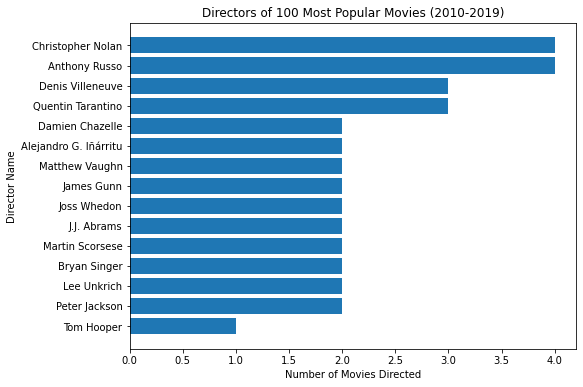

In [384]:
fig, ax = plt.subplots(figsize=(8, 6))

# Making the bar chart horizonal to more easily read animal types
ax.barh(popdir.index, popdir)

# inverting y axis so it shows in size order
ax.invert_yaxis()


# adjusting the X axis format to add commas
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_title("Directors of 100 Most Popular Movies (2010-2019)")
ax.set_ylabel("Director Name")
ax.set_xlabel("Number of Movies Directed")
plt.show()

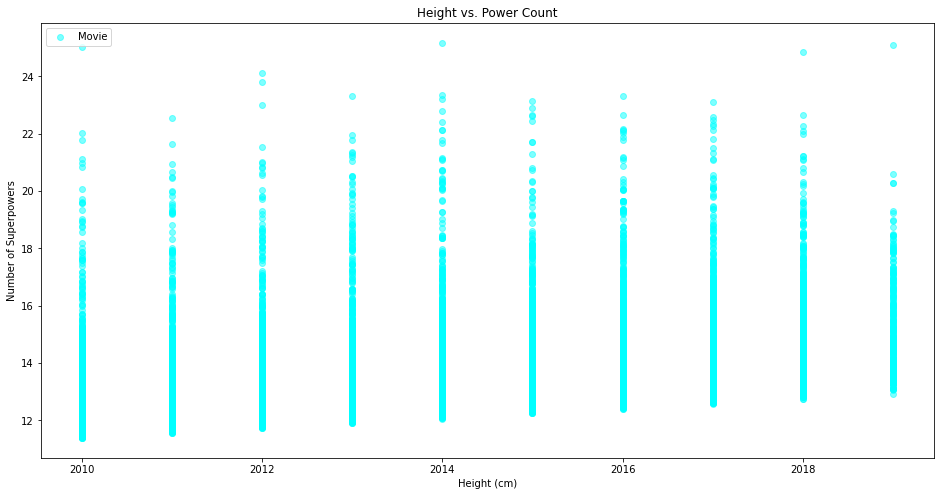

In [316]:

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
# question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
# # question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
# # question_2_other = question_2_df[(question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")]

# Plot data with different colors
ax.scatter(
#     x=question_2_male["Height"],
#     y=question_2_male["Power Count"],
#     alpha=0.5,
#     color="cyan",
#     label="Male"
    x=year_pop["start_year"],
    y=year_pop["popularity"],
    alpha=0.5,
    color="cyan",
    label="Movie"

    
)
# ax.scatter(
#     x=question_2_female["Height"],
#     y=question_2_female["Power Count"],
#     alpha=0.5,
#     color="gray",
#     label="Female"
# )
# ax.scatter(
#     x=question_2_other["Height"],
#     y=question_2_other["Power Count"],
#     alpha=0.5,
#     color="yellow",
#     label="Other"
# )

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

In [139]:
imdf_clean.max()

primary_title      Üç Harfliler: Adak
genres                            War
averagerating                     9.9
numvotes                      1841066
Director_Name             Ümit Kivanç
start_year                       2019
runtime_minutes                1440.0
dtype: object

In [140]:
imdf_clean = imdf_clean[imdf_clean['start_year'] < 2022]

In [141]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [142]:
#The filtering done at the top, must've removed anything that isn't out
#yet, becuase it would not have any reviews yet 

#i've also now learned that this data base only dates back to 2010 and 
#only has good data up to 2019

In [143]:
imdf_clean['start_year'].value_counts()

2017    950
2016    904
2018    893
2014    867
2015    840
2013    813
2012    749
2011    736
2010    662
2019    263
Name: start_year, dtype: int64

In [144]:
#here we see something interesting.... it appears that the total number
# of reviews increases with each year, but it takes 2 years for that value
# to plateau-ish... and it appears this data was taken before 2020
# so 2019 is the lowest, because it there hasnt been enough time 
# for more review to come in, and 2018 is 3rd from the top, so clearly is 
# hasn't recevied the majority of its reviews yet either. 

#actually scratch that... these are the start dates, so it must mean
#the start of production. 

# We want to give the most weight to the highest reviews from the most 
# recent years, so I will have to figure out how to do that 

# I think i want to find the trend and determine where their counts
# are expected to be in a couple years, and use that value to give 
# them extra weight 

In [146]:
imdf_clean['start_year'].value_counts(ascending=True)

2019    263
2010    662
2011    736
2012    749
2013    813
2015    840
2014    867
2018    893
2016    904
2017    950
Name: start_year, dtype: int64

In [147]:
imdf_clean['start_year'].value_counts(ascending=False)

2017    950
2016    904
2018    893
2014    867
2015    840
2013    813
2012    749
2011    736
2010    662
2019    263
Name: start_year, dtype: int64

In [148]:
x = np.array([2017, 2016, 2018, 2014, 2015, 2013, 2012, 2011, 2010, 2019])
y = np.array([950, 904, 893, 867, 840, 813, 749, 736, 662, 263])

38.535714285715244
-76776.53571428765


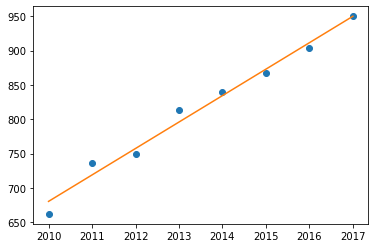

In [99]:
x = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
y = np.array([662, 736, 749, 813, 840, 867, 904, 950])
m, b = np.polyfit(x,y,1)

print(m)
print(b)

plt.plot(x,y,'o')

plt.plot(x, m*x + b)

In [ ]:
#plotting a best fit line over my value_counts for my 
# movie year, the slope can tell me approx how many movies we would
# expect to have in 2018 and 2019 with more time ... thus, our data from
# 2018 and 2019 should be weigted more heavily to make up for this lacking
# ..more weight should be given to highly rated films from these more recent
# years 

In [ ]:
# we can see that the counts # is lower in 2018 and 2019 then they 
should be, so we will use the formula above to increase the counts
of all those ratings for the movies made in those years 

check notebook for work on those 

In [101]:
imdf_clean['start_year'].mean()

2014.4191741565717

In [149]:
imdf_clean['start_year'].value_counts(ascending=True)

2019    263
2010    662
2011    736
2012    749
2013    813
2015    840
2014    867
2018    893
2016    904
2017    950
Name: start_year, dtype: int64

In [152]:
imdf_2010 = imdf_clean[imdf_clean['start_year'] == 2010]

In [170]:
imdf_clean.loc[imdf_clean['start_year'] == 2010][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes')

,start_year,numvotes,averagerating
3378,2010,51,7.6
2007,2010,51,7.9
7247,2010,51,7.1
2507,2010,51,7.8
4596,2010,51,7.4
...,...,...,...
1383,2010,611299,8.1
1742,2010,648854,8.0
811,2010,682218,8.3
1295,2010,1005960,8.1


In [171]:
imdf_clean.loc[imdf_clean['start_year'] == 2010][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2010.000000
numvotes         21559.296073
averagerating        7.523716
dtype: float64

In [172]:
imdf_clean.loc[imdf_clean['start_year'] == 2011][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2011.000000
numvotes         19150.562500
averagerating        7.563179
dtype: float64

In [173]:
imdf_clean.loc[imdf_clean['start_year'] == 2012][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2012.000000
numvotes         22259.671562
averagerating        7.591455
dtype: float64

In [174]:
imdf_clean.loc[imdf_clean['start_year'] == 2013][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2013.000000
numvotes         20469.396064
averagerating        7.549815
dtype: float64

In [175]:
imdf_clean.loc[imdf_clean['start_year'] == 2014][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2014.000000
numvotes         19631.572088
averagerating        7.635755
dtype: float64

In [176]:
imdf_clean.loc[imdf_clean['start_year'] == 2015][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2015.000000
numvotes         15036.526190
averagerating        7.621548
dtype: float64

In [177]:
imdf_clean.loc[imdf_clean['start_year'] == 2016][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2016.000000
numvotes         14214.139381
averagerating        7.634956
dtype: float64

In [178]:
imdf_clean.loc[imdf_clean['start_year'] == 2017][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year        2017.000000
numvotes         11258.005263
averagerating        7.687263
dtype: float64

In [179]:
imdf_clean.loc[imdf_clean['start_year'] == 2018][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year       2018.000000
numvotes         8410.992161
averagerating       7.702240
dtype: float64

In [180]:
imdf_clean.loc[imdf_clean['start_year'] == 2019][['start_year', 'numvotes',
                                                 'averagerating']].sort_values(by='numvotes').mean()

start_year       2019.000000
numvotes         4943.604563
averagerating       7.940304
dtype: float64

In [164]:
imdf_clean['numvotes'].sort_values()

5718         51
3884         51
2507         51
2456         51
2272         51
         ...   
1277    1183655
759     1211405
487     1299334
681     1387769
298     1841066
Name: numvotes, Length: 7677, dtype: int64